# The binary classification- predicting responses to a term deposit marketing campaign

### Author: Agnieszka Szewczyk

## Table of Contents
* [Import packages and data](#Import-packages-and-data)
* [Exploratory Data Analysis(EDA)](#Exploratory-Data-Analysis(EDA))
    * [Distribution of the target variable](#Distribution-of-the-target-variable)
    * [Categorical variables](#Categorical-variables)
    * [Numerical variables](#Numerical-variables)
* [Data Cleaning and Feature Engineering](#Data-Cleaning-and-Feature-Engineering)
    * [Train Test Split](#Train-Test-Split)
    * [Imputing missing values](#Imputing-missing-values)
    * [Handling outliers - Log Transformation and Winsorization](#Handling-outliers---Log-Transformation-and-Winsorization)
    * [One Hot Encoding](#One-Hot-Encoding)
    * [Standardization](#Standardization)
    * [Feature Selection](#Feature-Selection)
    * [Oversampling - SMOTE](#Oversampling---SMOTE)
* [Logistic Regression](#Logistic-Regression)
    * [Optimization of hyperparameters for LR - Grid Search](#Optimization-of-hyperparameters-for-LR---Grid-Search)
    * [Evaluation metrics - LR](#Evaluation-metrics---LR)
* [Decision Tree](#Decision-Tree)
    * [Optimization of hyperparameters for DT - Random Search](#Optimization-of-hyperparameters-for-DT---Random-Search)
    * [Evaluation metrics - DT](#Evaluation-metrics---DT)
* [Random Forest](#Random-Forest)
    * [Optimization of hyperparameters for RF - Random Search](#Optimization-of-hyperparameters-for-RF---Random-Search)
    * [Evaluation metrics - RF](#Evaluation-metrics---RF)
* [XGBoost](#XGBoost)
    * [Optimization of hyperparameters for XGB - Random Search](#Optimization-of-hyperparameters-for-XGB---Random-Search)
    * [Evaluation metrics - XGB](#Evaluation-metrics---XGB)
* [Conclusion](#Conclusion)
    

## Import packages and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_theme()

C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('C:/Users/ADMIN/Desktop/campaign_accept.csv')

## Exploratory Data Analysis(EDA)

Before going to any kind of modelling, we need to take a look at the kind of data that we have.

In [3]:
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


### Variables:
___
***Id*** - qualitative variable measured on the nominal scale - identifier for each sample in the dataset

***customer_age*** - quantitative variable measured on the ratio scale - age of the customer in years

***job_type*** - qualitative variable measured on the nominal scale - type of job of the customer

***marital*** - qualitative variable measured on the nominal scale - marital status of the custmer

***education*** - qualitative variable measured on the ordinal scale - education level of the customer

***default*** - qualitative variable measured on the nominal scale - customer has defaulted in past

***balance*** - quantitative variable measured on the ratio scale - balance in the customer's bank

***housing_loan*** - qualitative variable measured on the nominal scale - Has customer taken a housing loan?

***personal_loan*** - qualitative variable measured on the nominal scale - Has customer taken a personal loan?

***communication_type*** - qualitative variable measured on the nominal scale - type of communication made by the bank with the customer

***day_of_month*** - quantitative variable measured on the interval scale - day of month of the last contact made with customer

***month*** - qualitative variable measured on the nominal scale - month for the last contact made with customer

***last_contact_duration*** - quantitative variable measured on the ratio scale - last contact duration made with the customer (in seconds)

***num_contacts_in_campaign*** - quantitative variable measured on the ratio scale - number of contacts made with the customer during the current campaign

***days_since_prev_campaign_contact*** - quantitative variable measured on the ratio scale - number of days passed since customer was contacted in previous campaign

***num_contacts_prev_campaign*** -  quantitative variable measured on the ratio scale - number of contacts made with the customer during the previous campaign

***prev_campaign_outcome*** - qualitative variable measured on the nominal scale - success or failure in previous campaign

***term_deposit_subscribed (Target)*** - quantitative discrete variable - Has the customer taken a term deposit ?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

Looks like we have diferent datatypes, a lot of these variables are object datatypes.
Not all Machine Learning Models understand object datatypes so we will have to convert these strings to numbers.

In [5]:
null_values_per_variable = 100 * (df.isnull().sum()/df.shape[0]).round(3)
null_values_per_variable.sort_values(ascending=False)

days_since_prev_campaign_contact    81.6
customer_age                         2.0
balance                              1.3
last_contact_duration                1.0
marital                              0.5
personal_loan                        0.5
num_contacts_in_campaign             0.4
id                                   0.0
month                                0.0
prev_campaign_outcome                0.0
num_contacts_prev_campaign           0.0
communication_type                   0.0
day_of_month                         0.0
housing_loan                         0.0
default                              0.0
education                            0.0
job_type                             0.0
term_deposit_subscribed              0.0
dtype: float64

One feature *days_since_prev_campaign_contact* has a lot of null values around 81.6 %. There are few missing values in *customer_age*, *balance*, *last_contact_duration*, *personal_loan*, *marital* and *num_contacts_in_campaign*.

In [6]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [7]:
df.describe(include=['O'])

,id,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
count,31647,31647,31497,31647,31647,31647,31498,31647,31647,31647
unique,31647,12,3,4,2,2,2,3,12,4
top,id_43823,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,1,6816,18945,16247,31094,17700,26463,20480,9685,25833


*id* has unique value for each customer. We will not use it for modeling.

### Distribution of the target variable

In [8]:
df['term_deposit_subscribed'].value_counts()

0    28253
1     3394
Name: term_deposit_subscribed, dtype: int64

In [9]:
df['term_deposit_subscribed'].value_counts(normalize=True)

0    0.892754
1    0.107246
Name: term_deposit_subscribed, dtype: float64

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='count'>

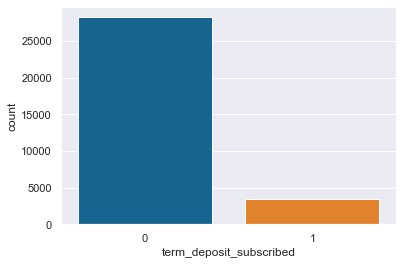

In [10]:
plt.style.use('tableau-colorblind10')
sns.countplot(x = 'term_deposit_subscribed', data=df)

Our dataset is very imbalanced. Only about 10 % of the examples have value 1.

### Categorical variables

Now we will analyze frequency, distribution of categorical variables.

In [11]:
df.select_dtypes('object').columns

Index(['id', 'job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

In [12]:
cat_cols=[i for i in df.select_dtypes('object').columns if i != 'id']

In [13]:
for i in cat_cols:
    print('Distribution of:', i)
    print(df[i].value_counts())
    print()

Distribution of: job_type
blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: job_type, dtype: int64

Distribution of: marital
married     18945
single       8857
divorced     3695
Name: marital, dtype: int64

Distribution of: education
secondary    16247
tertiary      9321
primary       4787
unknown       1292
Name: education, dtype: int64

Distribution of: default
no     31094
yes      553
Name: default, dtype: int64

Distribution of: housing_loan
yes    17700
no     13947
Name: housing_loan, dtype: int64

Distribution of: personal_loan
no     26463
yes     5035
Name: personal_loan, dtype: int64

Distribution of: communication_type
cellular     20480
unknown       9151
telephone     2016
Name: communication_type, dtype: int64

Distribution of: month
may    9685
jul    4

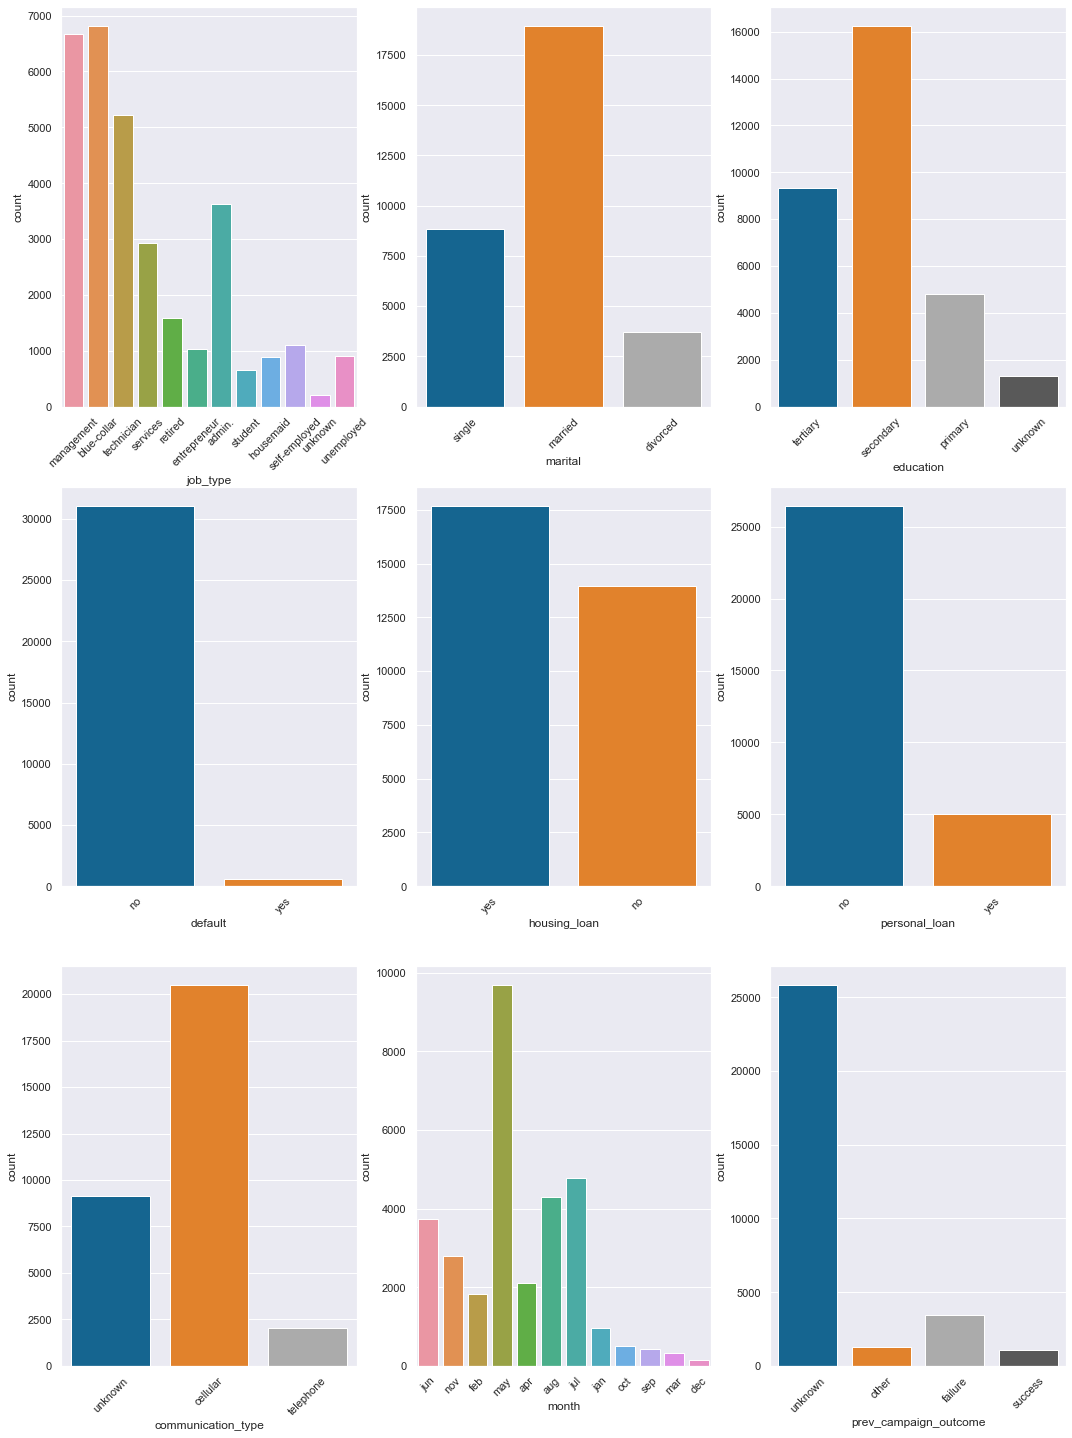

In [14]:
plt.figure(figsize=(18,25))
plt.style.use('tableau-colorblind10')

for i, feature in enumerate(df[cat_cols]):
    plt.subplot(3,3, i+1)
    sns.countplot(df[feature], label=feature)
    plt.xticks(rotation=45)

Observations:

* A small number of students and a large number of blue-collar, management and technician customers
* Most of customers are married
* Most of the clients have a secondary level of education
* The significant majority of customes has not defaulted in past
* More than 50% have taken housing loan
* More than 75% have taken personal loan
* Major communication type is cellular
* Most of the customers were last contacted in May
* Most customers where not contacted in previous campaign, because we suspect that the value *unknown* means this

Now we will check relationship of each variable with the target variable.

In [15]:
for i in cat_cols:
    print(df[[i,'term_deposit_subscribed']].groupby([i]).mean().sort_values(by='term_deposit_subscribed', ascending=False))
    print()

               term_deposit_subscribed
job_type                              
student                       0.269985
retired                       0.216845
unemployed                    0.153163
management                    0.126763
unknown                       0.125628
self-employed                 0.117012
admin.                        0.104770
technician                    0.099425
housemaid                     0.081747
services                      0.079028
entrepreneur                  0.073288
blue-collar                   0.066461

          term_deposit_subscribed
marital                          
single                   0.138534
divorced                 0.106089
married                  0.093059

           term_deposit_subscribed
education                         
tertiary                  0.139577
unknown                   0.126935
secondary                 0.094848
primary                   0.081053

         term_deposit_subscribed
default                         
no   

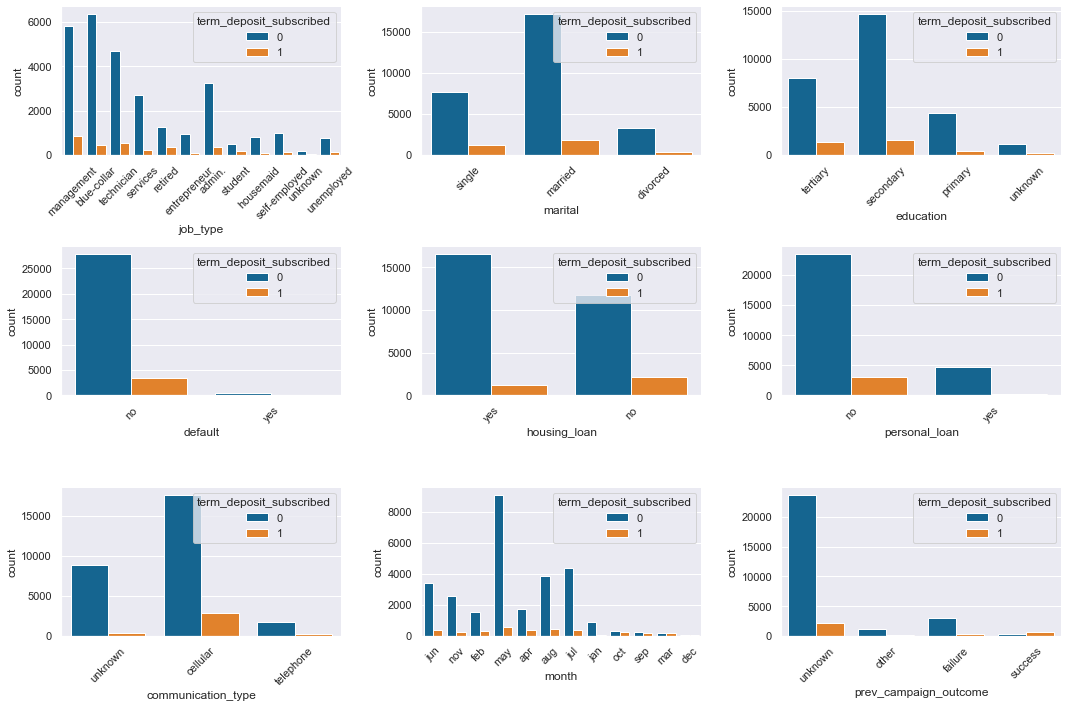

In [16]:
plt.figure(figsize=(15, 10))
plt.style.use('tableau-colorblind10')


for i, feature in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature, hue='term_deposit_subscribed')  
    plt.xticks(rotation=45)
    plt.tight_layout()
    
sns.despine()

The plots below show the probability of term deposit subscribed with the division into each variable and its individual values. The red line indicate the probabilty calculated on the basis of all observations.

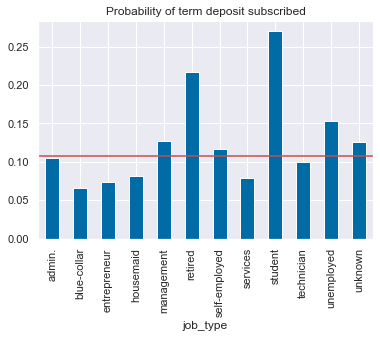

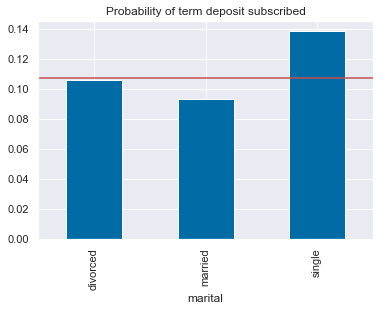

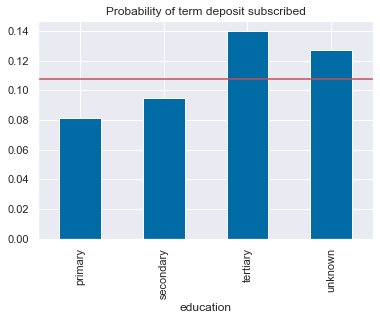

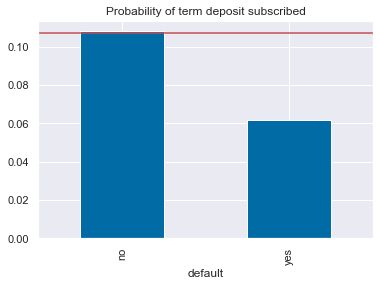

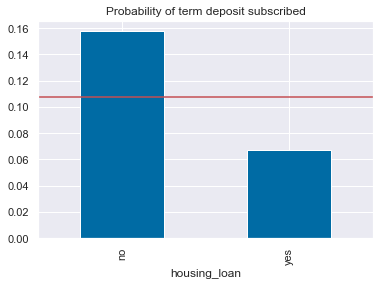

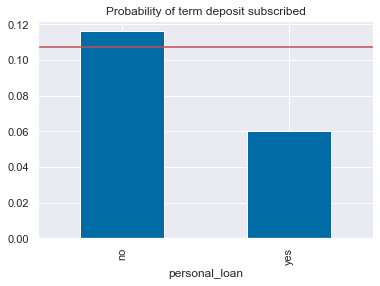

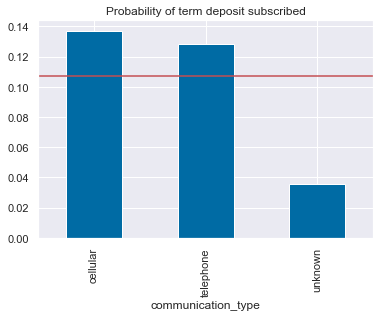

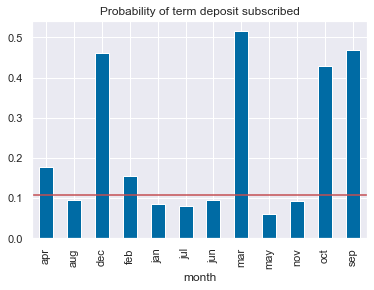

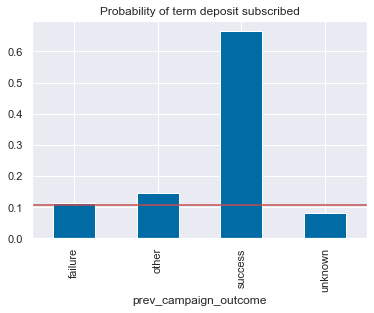

In [17]:
for i in cat_cols:
    df[[i,'term_deposit_subscribed']].groupby(i).agg('mean').plot(kind='bar',legend=False)
    plt.hlines(y=np.mean(df['term_deposit_subscribed']),xmin=-5, xmax=16, color='r')
    plt.title('Probability of term deposit subscribed')

Observations:

* Retired people and students tend to subscribe more than average
* Single people tend to subscribe to team deposit
* People with tertiary level of education are more convinced to subscribe 
* Customers without housing and personal loan tend to subscribe to team deposit
* Customers approached by cellular and telephone tend to subscribe more than average
* Months that have a high probability of subscriptions are March, September, October and December
* Customers who subscribed during previous campaign tend to subscribe more

### Numerical variables

In [18]:
num_cols=df.select_dtypes('number').columns
num_cols

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'term_deposit_subscribed'],
      dtype='object')

In [19]:
num_cols=[i for i in df.select_dtypes('number').columns if i != 'term_deposit_subscribed']

We will check the skewness of numerical variables to see if we have outliers.

In [20]:
for i in num_cols:
    print(i ,'skewness:')
    print(df[i].skew())
    print()

customer_age skewness:
0.6619530687835736

balance skewness:
8.505127273489762

day_of_month skewness:
0.09190899020750912

last_contact_duration skewness:
3.1658690138459744

num_contacts_in_campaign skewness:
5.000171590168278

days_since_prev_campaign_contact skewness:
0.649478076491197

num_contacts_prev_campaign skewness:
45.83300679544707



*balance*, *last_contact_duration*, *num_contacts_in_campaign*, *num_contacts_prev_campaign* have high skewness. It tell us about existence of outliers.

We will draw distribution graphs of numerical variables depending on the target variable and check mean and median. 
A mean is very much influenced by outliers so we should pay more attention to median. 

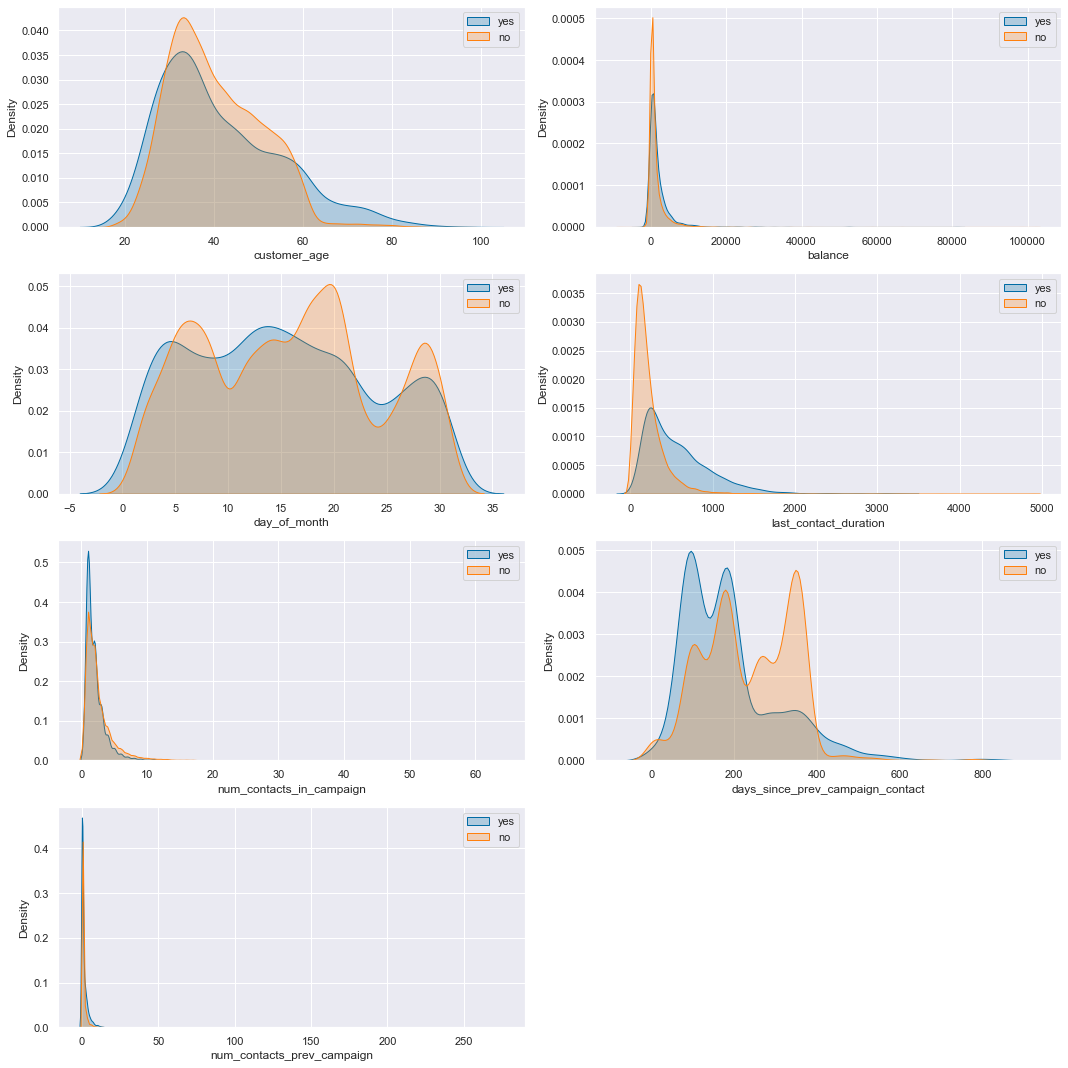

In [21]:
plt.figure(figsize=(15, 15))
plt.style.use('tableau-colorblind10')

for i, feature in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    ax = sns.kdeplot(df[feature][df['term_deposit_subscribed'] == 1], shade=True)
    sns.kdeplot(df[feature][df['term_deposit_subscribed'] == 0], shade=True)
    plt.legend(['yes', 'no'])
    ax.set(xlabel=feature) 
    plt.tight_layout()

In [22]:
df.groupby('term_deposit_subscribed').agg({'customer_age': ['mean', 'median'],
                           'balance': ['mean', 'median'],
                           'day_of_month': ['mean', 'median'],
                          'last_contact_duration': ['mean', 'median'],
                           'num_contacts_in_campaign': ['mean', 'median'],
                           'days_since_prev_campaign_contact': ['mean', 'median'],
                           'num_contacts_prev_campaign': ['mean', 'median']})

customer_age             balance        day_of_month  \
                                mean median         mean median         mean   
term_deposit_subscribed                                                        
0                          40.322765   39.0  1312.300072  418.0    15.896153   
1                          41.405875   38.0  1831.665873  763.0    15.172658   

                               last_contact_duration         \
                        median                  mean median   
term_deposit_subscribed                                       
0                         16.0            219.167542  164.0   
1                         15.0            564.287712  465.0   

                        num_contacts_in_campaign         \
                                            mean median   
term_deposit_subscribed                                   
0                                       2.853845    2.0   
1                                       2.133432    2.0   

                        days_since_prev_campaign_contact         \
                                                    mean median   
term_deposit_subscribed                                           
0                                             235.146142  234.0   
1                                             189.486466  181.0   

                        num_contacts_prev_campaign         
                                              mean median  
term_deposit_subscribed                                    
0                                         0.513751    0.0  
1                                         1.239835    0.0

Observations:

* We can see little difference between distributions
* Customers who subscribed have more funds in their account
* *last_contact_duration* takes much higher values for people who responded to campaign


<AxesSubplot:>

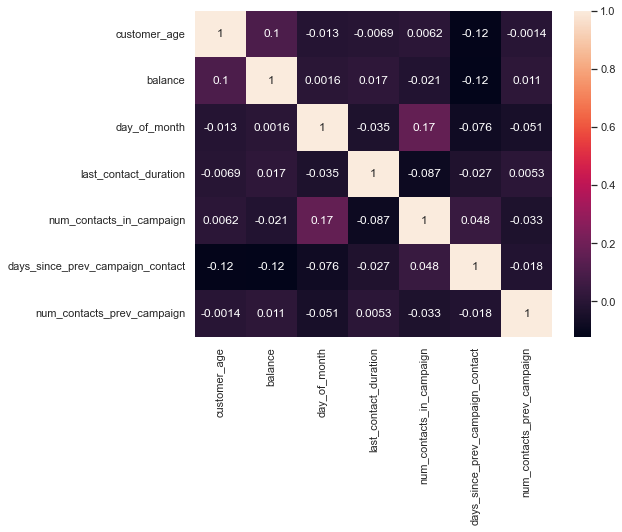

In [23]:
plt.figure(figsize=(8, 6))
plt.style.use('tableau-colorblind10')

sns.heatmap(df[num_cols].corr(), annot=True)

The correlation between variables is not statistically significant.

## Data Cleaning and Feature Engineering

First we will remove unnecessary variables.

In [24]:
df.drop(['id','days_since_prev_campaign_contact'], axis=1, inplace=True)

In [25]:
df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0


### Train Test Split

We will split the data set into two pieces — a training set and a testing set to simulate how a model would perform on new data and to do evaluation of models.

In [26]:
X = df.drop('term_deposit_subscribed',axis=1)
y = df['term_deposit_subscribed']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

### Imputing missing values

Machine Learning Models can not work efficiently on null values. We do not want to lose data so we will try to imput missing values.

In [28]:
X_train.isna().sum()

customer_age                  429
job_type                        0
marital                       103
education                       0
default                         0
balance                       280
housing_loan                    0
personal_loan                 105
communication_type              0
day_of_month                    0
month                           0
last_contact_duration         215
num_contacts_in_campaign       76
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

We will try to implement mising values using the following function, which uses the relationship between two variables.

In [29]:
def imp (train, test, imp_col, gb_col):
    imp_col_skew=train[imp_col].skew()
    if np.abs(imp_col_skew)>=0.5:
        agg = train.groupby([gb_col]).agg({imp_col: 'median'})
    else:
        agg = train.groupby([gb_col]).agg({imp_col: 'mean'})
        
    train = pd.merge(train, agg, how='left', on=[gb_col])
    train[imp_col] = np.where(train[imp_col + '_x'].isna(), train[imp_col + '_y'].round(), train[imp_col + '_x'])
    train= train.drop([imp_col + '_x', imp_col + '_y'], axis=1)
    
    test = pd.merge(test, agg, how='left', on=[gb_col])
    test[imp_col] = np.where(test[imp_col + '_x'].isna(), test[imp_col + '_y'].round(), test[imp_col + '_x'])
    test=test.drop([imp_col + '_x', imp_col + '_y'], axis=1)
    
    return train, test

#### customer_age

In [30]:
X_train.groupby(['marital']).agg({'customer_age': ['median','mean']})

customer_age           
               median       mean
marital                         
divorced         45.0  45.406572
married          42.0  42.959905
single           32.0  33.165868

A different median of *customer_age* exists for people with different marital status.

In [31]:
X_train, X_test = imp(X_train, X_test, 'customer_age', 'marital')

#### last_contact_duration

In [32]:
X_train.groupby(['prev_campaign_outcome']).agg({'last_contact_duration': ['median','mean', 'count']})

last_contact_duration                   
                                     median        mean  count
prev_campaign_outcome                                         
failure                               176.0  243.147439   2401
other                                 179.0  255.937853    885
success                               255.0  321.772789    735
unknown                               176.0  254.345724  17916

*last_contact_duration* have different median for different values of *prev_campaign_outcome*.


In [33]:
X_train, X_test = imp(X_train, X_test, 'last_contact_duration', 'prev_campaign_outcome')

#### num_contacts_in_campaign   

In [34]:
X_train.groupby(['prev_campaign_outcome']).agg({'num_contacts_in_campaign': ['median','mean', 'count']})

num_contacts_in_campaign                 
                                        median      mean  count
prev_campaign_outcome                                          
failure                                    1.0  1.960412   2425
other                                      2.0  2.416667    888
success                                    1.0  1.816825    737
unknown                                    2.0  2.930212  18026

*num_contats_in_campaign* have different median for different values of *prev_campaign_outcome*.

In [35]:
X_train, X_test = imp(X_train, X_test, 'num_contacts_in_campaign', 'prev_campaign_outcome')

#### balance

In [36]:
X_train.groupby(['default']).agg({'balance': ['median','mean','count']})

balance                    
         median         mean  count
default                            
no        466.0  1389.947513  21491
yes        -7.0  -134.868766    381

In [37]:
X_train[X_train['default']=='no'].groupby(['personal_loan']).agg({'balance': ['median', 'mean','count']})

balance                    
               median         mean  count
personal_loan                            
no              508.0  1497.320554  18050
yes             276.0   814.085055   3339

With *balance* we will do it differently than after.
1. The customers who had defaulted in past and have null *balance* will be imputed using the relationship between *balance* and *default*.
2. The rest of missing values we will impute using function *imp* and the relationship between *balance* and *personal_loan*.

In [38]:
balance_def = X_train.groupby(['default']).agg({'balance': 'median'})

In [39]:
X_train = pd.merge(X_train, balance_def, how='left', on=['default'])
X_train['balance'] = np.where((X_train['balance_x'].isna()) & (X_train['default'] == 'yes'), X_train['balance_y'],
                             X_train['balance_x'])
X_train.drop(['balance_x', 'balance_y'], axis=1, inplace=True)

X_test = pd.merge(X_test, balance_def, how='left', on=['default'])
X_test['balance'] = np.where((X_test['balance_x'].isna()) & (X_test['default'] == 'yes'), X_test['balance_y'],
                             X_test['balance_x'])
X_test.drop(['balance_x', 'balance_y'], axis=1, inplace=True)

In [40]:
X_train, X_test = imp(X_train, X_test, 'balance', 'personal_loan')

*marital* and *personal_loan* are qualitative variables and have a very small percentage of missing values so we imputed them with the most common value.

In [41]:
cols=['marital', 'personal_loan']
for i in cols:
    val=X_train[i].value_counts().index[0]
    X_train[i].fillna(val, inplace=True)
    X_test[i].fillna(val, inplace=True)

In [42]:
X_train.isnull().sum()

job_type                      0
marital                       0
education                     0
default                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
customer_age                  3
last_contact_duration         0
num_contacts_in_campaign      0
balance                       0
dtype: int64

We still have mising values of customer_age. We will impute them using median.

In [43]:
median=X_train['customer_age'].median()
X_train['customer_age'].fillna(median, inplace=True)
X_test['customer_age'].fillna(median, inplace=True)

### Handling outliers - Log Transformation and Winsorization

Machine learning models are sensitive to the range and distribution of attribute values. Data outliers can spoil and mislead the training process resulting in longer training times, less accurate models and ultimately poorer results.

customer_age


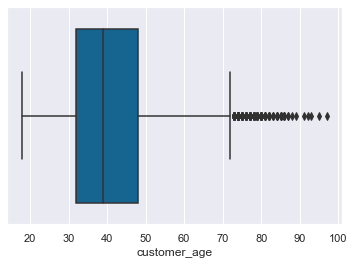

balance


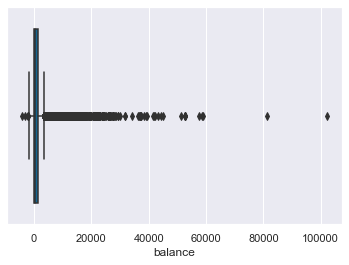

day_of_month


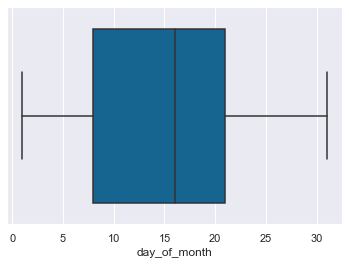

last_contact_duration


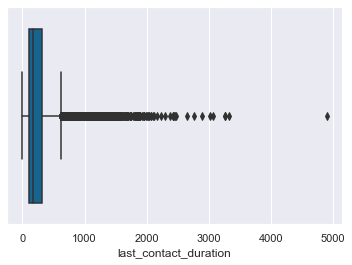

num_contacts_in_campaign


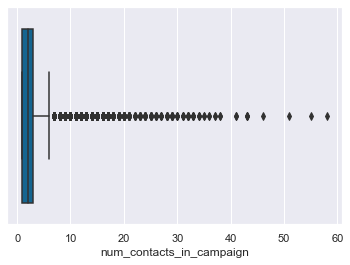

num_contacts_prev_campaign


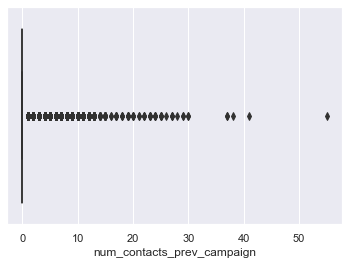

In [44]:
num_cols=[i for i in df.select_dtypes('number').columns if i != 'term_deposit_subscribed']
for i in num_cols:
    print(i)
    sns.boxplot(data=X_train, x=i)
    plt.show()

customer_age
0.6717345326686716
18.0


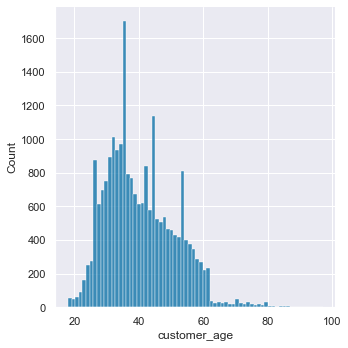

balance
8.33845050408105
-4062.0


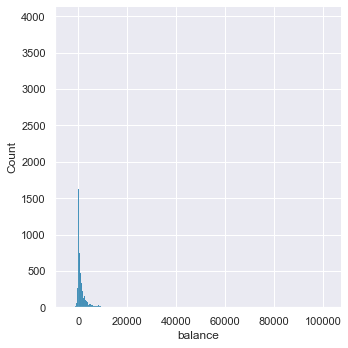

day_of_month
0.0898207864819656
1


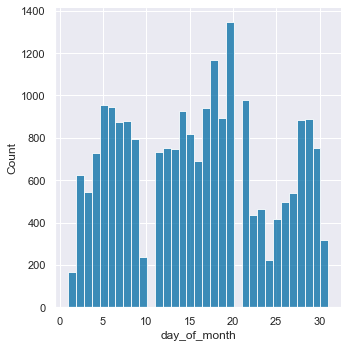

last_contact_duration
3.1847772619748214
0.0


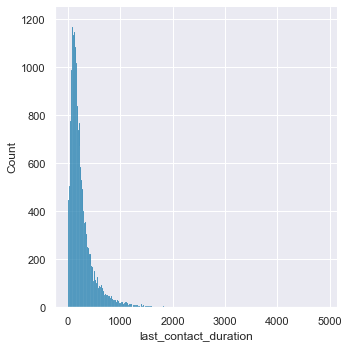

num_contacts_in_campaign
5.0637155609652025
1.0


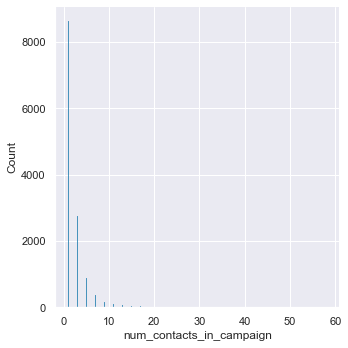

num_contacts_prev_campaign
7.639758709953269
0


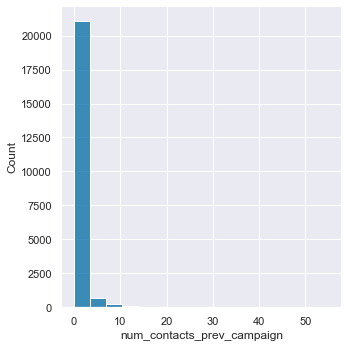

In [45]:
for i in num_cols:
    print(i)
    print(X_train[i].skew())
    print(X_train[i].min())
    sns.displot(data=X_train, x=i)
    plt.show()

In [46]:
log_cols = [i for i in num_cols if i != 'day_of_month']

In [47]:
for i in log_cols:
    min = X_train[i].min()
    if min <= 0:
        X_train[i+'_log'] = np.log(X_train[i] + 1 + np.abs(min))
    else:
        X_train[i+'_log'] = np.log(X_train[i])

In [48]:
for i in log_cols:
    min = X_test[i].min()
    if min <= 0:
        X_test[i+'_log'] = np.log(X_test[i] + 1 + np.abs(min))
    else:
        X_test[i+'_log'] = np.log(X_test[i])

customer_age_log


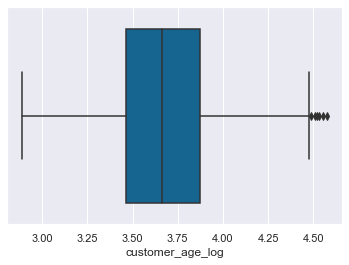

balance_log


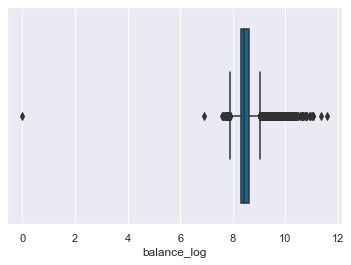

last_contact_duration_log


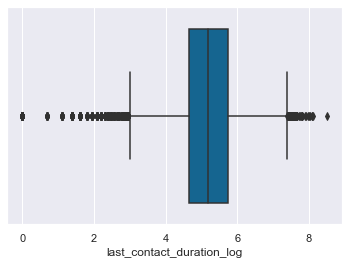

num_contacts_in_campaign_log


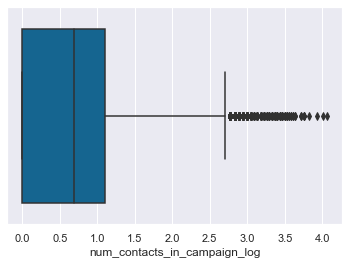

num_contacts_prev_campaign_log


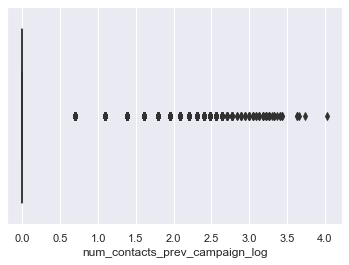

In [49]:
for i in [i+'_log' for i in log_cols]:
    print(i)
    sns.boxplot(data=X_train, x=i)
    plt.show()

We chose numeric variables with high skewness and we did a logarithmic transformation on them. We can see that we now have fewer outliers.

customer_age_log
0.03901832924835425


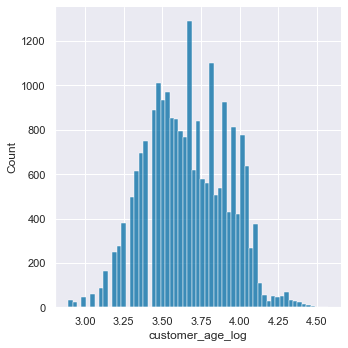

balance_log
1.4732717509813165


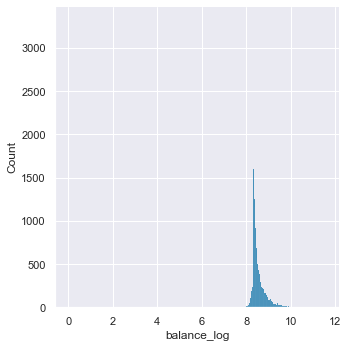

last_contact_duration_log
-1.184175910660616


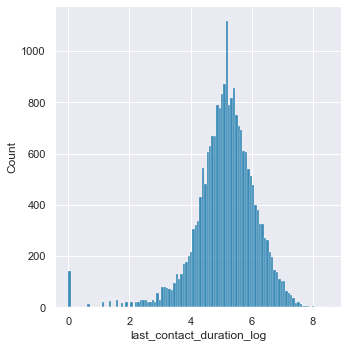

num_contacts_in_campaign_log
0.884767340996495


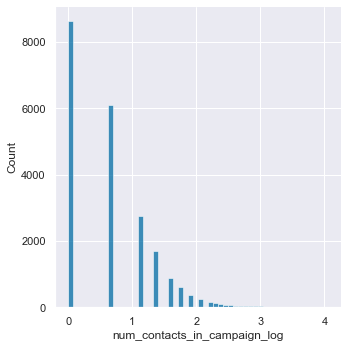

num_contacts_prev_campaign_log
2.515030565854083


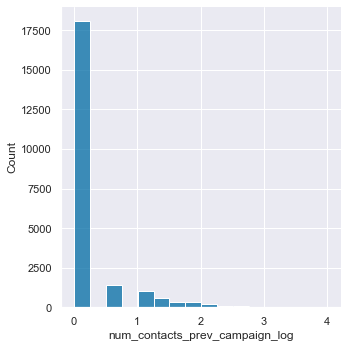

In [50]:
for i in [i+'_log' for i in log_cols]:
    print(i)
    print(X_train[i].skew())
    sns.displot(data=X_train, x=i)
    plt.show()

We decided to change *num_contacts_in_campaign* and *num_contacts_prev_campaign* to categorical variables to deal with outliers.

In [51]:
to_char = ['num_contacts_in_campaign', 'num_contacts_prev_campaign']

In [52]:
for i in to_char:
    print(i)
    print(X_train[i].value_counts(normalize=True))
    print()

num_contacts_in_campaign
1.0     0.389581
2.0     0.275054
3.0     0.123555
4.0     0.076020
5.0     0.039726
6.0     0.028169
7.0     0.016206
8.0     0.011602
9.0     0.007403
10.0    0.006230
11.0    0.004650
13.0    0.003747
12.0    0.003566
16.0    0.001806
17.0    0.001761
15.0    0.001625
14.0    0.001264
18.0    0.000993
20.0    0.000993
19.0    0.000903
21.0    0.000677
24.0    0.000451
25.0    0.000406
29.0    0.000406
23.0    0.000406
28.0    0.000316
22.0    0.000271
26.0    0.000271
32.0    0.000271
33.0    0.000226
27.0    0.000181
30.0    0.000181
31.0    0.000181
43.0    0.000135
34.0    0.000135
41.0    0.000090
36.0    0.000090
38.0    0.000090
35.0    0.000090
37.0    0.000090
51.0    0.000045
55.0    0.000045
58.0    0.000045
46.0    0.000045
Name: num_contacts_in_campaign, dtype: float64

num_contacts_prev_campaign
0     0.816269
1     0.062748
2     0.046948
3     0.025370
4     0.015033
5     0.009164
6     0.006004
7     0.004966
8     0.003160
9     0.001986
11

In [53]:
X_train['num_contacts_in_campaign'] = np.where(X_train['num_contacts_in_campaign']>=6, '6 or more', X_train['num_contacts_in_campaign'])
X_test['num_contacts_in_campaign'] = np.where(X_test['num_contacts_in_campaign']>=6, '6 or more', X_test['num_contacts_in_campaign'])

In [54]:
X_train['num_contacts_prev_campaign'] = np.where(X_train['num_contacts_prev_campaign']>=3, '3 or more', X_train['num_contacts_prev_campaign'])
X_test['num_contacts_prev_campaign'] = np.where(X_test['num_contacts_prev_campaign']>=3, '3 i wiecej', X_test['num_contacts_prev_campaign'])

In [55]:
for i in to_char:
    print(i)
    print(X_train[i].value_counts(normalize=True))
    print()

num_contacts_in_campaign
1.0          0.389581
2.0          0.275054
3.0          0.123555
6 or more    0.096064
4.0          0.076020
5.0          0.039726
Name: num_contacts_in_campaign, dtype: float64

num_contacts_prev_campaign
0            0.816269
3 or more    0.074034
1            0.062748
2            0.046948
Name: num_contacts_prev_campaign, dtype: float64



In [56]:
log_cols = [i+'_log' for i in log_cols if i not in  to_char]

In [57]:
for i in log_cols:
    q3, q1 = np.percentile(X_train[i], [75 ,25])
    iqr = q3 - q1
    min_threshold =q1 - 1.5*iqr
    max_threshold =q3+ 1.5*iqr

    index_max_train = X_train[X_train[i] > max_threshold].index
    index_min_train = X_train[X_train[i] < min_threshold].index
    index_max_test = X_test[X_test[i] > max_threshold].index
    index_min_test = X_test[X_test[i] < min_threshold].index
    X_train.loc[index_max_train, i] = max_threshold
    X_train.loc[index_min_train, i] = min_threshold
    X_test.loc[index_max_test, i] = max_threshold
    X_test.loc[index_min_test, i] = min_threshold

We removed remaining outliers using Winsorization.

In [58]:
X_train.columns

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'day_of_month', 'month',
       'num_contacts_prev_campaign', 'prev_campaign_outcome', 'customer_age',
       'last_contact_duration', 'num_contacts_in_campaign', 'balance',
       'customer_age_log', 'balance_log', 'last_contact_duration_log',
       'num_contacts_in_campaign_log', 'num_contacts_prev_campaign_log'],
      dtype='object')

In [59]:
to_drop = ['last_contact_duration', 'customer_age', 'balance', 
           'num_contacts_in_campaign_log', 'num_contacts_prev_campaign_log']

In [60]:
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

### One Hot Encoding

Many machine learning algorithms can not operate on label data directly. They require all variables to be numeric. This means that categorical data must be converted to a numerical form.
We will use One Hot Encoding because we have categorical variables where no ordinal relationship exists.

In [61]:
ohe_cols = X_train.select_dtypes(include=['object']).columns
ohe_cols

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'num_contacts_in_campaign'],
      dtype='object')

In [62]:
for i in ohe_cols:
    
    dummy = pd.get_dummies(X_train[i], prefix = i)
    dummy_test = pd.get_dummies(X_test[i], prefix = i)
    
    mask = str(X_train[i].value_counts().index[0])

    dummy.drop(i + '_' + mask, inplace=True, axis=1)
    dummy_test.drop(i + '_' + mask, inplace=True, axis=1)
    
    X_train = pd.concat([X_train,dummy], axis=1)
    X_test = pd.concat([X_test,dummy_test], axis=1)
  
    X_train.drop(i, inplace=True, axis=1)
    X_test.drop(i, inplace=True, axis=1)

### Standardization

Some machine learning algorithms are sensitive to feature scaling. E.g. Logistic Regression that use gradient descent as an optimization technique require data to be scaled. We do standardization to deal with it.

In [63]:
std_cols = X_train.select_dtypes(include=['float64']).columns
std_cols

Index(['customer_age_log', 'balance_log', 'last_contact_duration_log'], dtype='object')

In [64]:
scale = StandardScaler()

In [65]:
scale.fit(X_train[std_cols])

StandardScaler()

In [66]:
X_train_scaled = pd.DataFrame(scale.transform(X_train[std_cols]), columns = ['balance_scaled', 'last_contact_duration_scaled', 'customer_age_scaled'])
X_train = pd.concat([X_train.drop(std_cols, axis=1), X_train_scaled], axis=1)

X_test_scaled = pd.DataFrame(scale.transform(X_test[std_cols]), columns = ['balance_scaled', 'last_contact_duration_scaled', 'customer_age_scaled'])
X_test = pd.concat([X_test.drop(std_cols, axis=1), X_test_scaled], axis=1)

### Feature Selection

We use feature selection to make the process more accurate. It also increases the prediction power of the algorithms by selecting the most critical variables and eliminating the redundant and irrelevant ones.
We choose  feature elimination (RFE) with Logistic Regression as a estimator. We decide to select 20 features.

In [67]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=20)

In [68]:
rfe_fit = rfe.fit(X_train, y_train)

In [69]:
features = X_train.columns[rfe_fit.support_]
features

Index(['job_type_retired', 'job_type_student', 'marital_single',
       'housing_loan_no', 'personal_loan_yes', 'communication_type_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_nov', 'month_oct', 'month_sep',
       'prev_campaign_outcome_success', 'num_contacts_in_campaign_4.0',
       'num_contacts_in_campaign_6 or more', 'customer_age_scaled'],
      dtype='object')

In [70]:
X_train = X_train[features]
X_test = X_test[features]

### Oversampling - SMOTE

Our dataset is very imbalanced. We choose SMOTE which creates synthetic samples by randomly sampling the characteristics from occurrences in the minority class.

In [71]:
y_train.value_counts(normalize=True)

0    0.895585
1    0.104415
Name: term_deposit_subscribed, dtype: float64

In [72]:
smote = SMOTE(random_state=0, sampling_strategy=0.55)

In [73]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [74]:
y_resampled.value_counts(normalize=True)

0    0.645171
1    0.354829
Name: term_deposit_subscribed, dtype: float64

## Logistic Regression

### Optimization of hyperparameters for LR - Grid Search

The first model we will check is Logistic Regression. We will use Grid Search to optimize the hyperparameters. This method exhaustively considers all parameter combinations and it is suitable for this model because it does not have a large number of paramers.

In [75]:
lr = LogisticRegression(max_iter=1000, random_state=123)

In [76]:
params = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
}

In [77]:
grid_search = GridSearchCV(estimator=lr, param_grid=params, n_jobs=-1, cv=5, scoring='roc_auc')

In [78]:
grid_result = grid_search.fit(X_resampled, y_resampled)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.930970 using {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [79]:
lr_opt = grid_result.best_estimator_

### Evaluation metrics - LR

In [80]:
y_pred = lr_opt.predict(X_test)

In [81]:
confMatrix=pd.DataFrame(confusion_matrix(y_test, y_pred))
confMatrix.columns=[['Predicted 0','Predicted 1']]
confMatrix.index=[['True 0','True 1']]
print('')
print('Confusion Matrix :')
print(confMatrix)


Confusion Matrix :
       Predicted 0 Predicted 1
True 0        7556         858
True 1         258         823


In [82]:
lr_opt_accuracy = accuracy_score(y_test, y_pred)
lr_opt_recall = recall_score(y_test, y_pred)
lr_opt_precision = precision_score(y_test, y_pred)
lr_opt_f1 = f1_score(y_test, y_pred)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8414
           1       0.49      0.76      0.60      1081

    accuracy                           0.88      9495
   macro avg       0.73      0.83      0.76      9495
weighted avg       0.91      0.88      0.89      9495



In [84]:
y_pred_train = lr_opt.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     19839
           1       0.46      0.78      0.58      2313

    accuracy                           0.88     22152
   macro avg       0.72      0.84      0.76     22152
weighted avg       0.92      0.88      0.90     22152



#### ROC curve

In [85]:
y_pred_proba = lr_opt.predict_proba(X_test)[:,1]
fpr_lr_opt, tpr_lr_opt, _ = roc_curve(y_test, y_pred_proba)
lr_opt_auc = roc_auc_score(y_test, y_pred_proba)

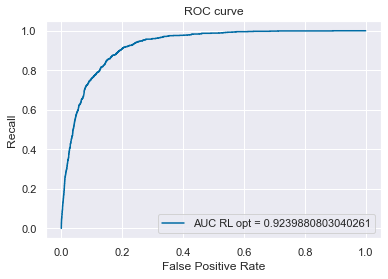

In [86]:
plt.plot(fpr_lr_opt,tpr_lr_opt,label="AUC RL opt = "+str(lr_opt_auc))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [87]:
y_pred_proba_train = lr_opt.predict_proba(X_train)[:,1]
lr_opt_auc_train = roc_auc_score(y_train, y_pred_proba_train)
lr_opt_auc_train

0.9274899320855847

#### Precision-recall curve

In [88]:
precision_lr_opt, recall_lr_opt, _ = precision_recall_curve(y_test, y_pred_proba)

In [89]:
PR_score_lr_opt = auc(recall_lr_opt, precision_lr_opt)
PR_score_lr_opt

0.6006798535930461

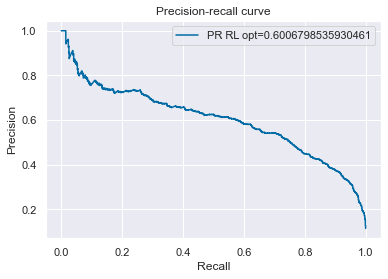

In [90]:
plt.plot(recall_lr_opt, precision_lr_opt, label='PR RL opt=' +str(PR_score_lr_opt))
plt.title('Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [91]:
precision_recall_curve(y_test, y_pred_proba)
precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_proba_train)
auc(recall_train, precision_train)

0.5957179476676743

In [92]:
results_lr_opt = pd.DataFrame({
    'model': ['Logistic Regression opt'], 
    'accuracy': [lr_opt_accuracy],
    'precision': [lr_opt_precision],
    'recall': [lr_opt_recall],
    'f1-score': [lr_opt_f1],
    'auc': [lr_opt_auc],
    'PR_score': [PR_score_lr_opt]
    })
results_lr_opt

,model,accuracy,precision,recall,f1-score,auc,PR_score
0,Logistic Regression opt,0.882464,0.48959,0.761332,0.595945,0.923988,0.60068


The results are almost identical for test and train sets.
So we are not have an overfitting of the model.

The model achieves higher recall value at the expense of precision.
On average 5 for 10 people indicated by the model as subscribers will really take a deposit.
On average 8 for 10 people who really take a deposit is indicated by the model.


## Decision Tree

### Optimization of hyperparameters for DT - Random Search

Now we will check is Decision Tree. Due to a large number of checked values we will use Random Search to optimize the hyperparameters. This method can sample a given number of candidates from a parameter space with a specified distribution. 

In [93]:
dt = DecisionTreeClassifier(random_state=123)

In [94]:
params = {
    'max_depth': np.arange(2,15),
    'min_samples_leaf': np.arange(20,101),
    'min_samples_split': np.arange(20,101),
    'criterion': ["gini", "entropy"],
    'max_features': np.arange(5,20)
}

In [95]:
random_search = RandomizedSearchCV(estimator=dt, 
                           param_distributions=params, 
                           cv=3, n_jobs=-1, scoring = "roc_auc", n_iter=1000, random_state=123)

In [96]:
random_search.fit(X_resampled, y_resampled)
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

Best: 0.937689 using {'min_samples_split': 83, 'min_samples_leaf': 22, 'max_features': 16, 'max_depth': 14, 'criterion': 'entropy'}


In [97]:
params = {
    'max_depth': np.arange(8,15),
    'min_samples_leaf': np.arange(20,30),
    'min_samples_split': np.arange(75,90),
    'criterion': ["gini", "entropy"],
    'max_features': np.arange(8,19)
}

In [98]:
random_search = RandomizedSearchCV(estimator=dt, 
                           param_distributions=params, 
                           cv=3, n_jobs=-1, scoring = "roc_auc", n_iter=1000, random_state=123)

In [99]:
random_search.fit(X_resampled, y_resampled)
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

Best: 0.938493 using {'min_samples_split': 86, 'min_samples_leaf': 20, 'max_features': 11, 'max_depth': 14, 'criterion': 'entropy'}


In [100]:
dt_opt = random_search.best_estimator_

### Evaluation metrics - DT

In [101]:
y_pred = dt_opt.predict(X_test)

In [102]:
confMatrix=pd.DataFrame(confusion_matrix(y_test, y_pred))
confMatrix.columns=[['Predicted 0','Predicted 1']]
confMatrix.index=[['True 0','True 1']]
print('')
print('Confusion Matrix :')
print(confMatrix)


Confusion Matrix :
       Predicted 0 Predicted 1
True 0        7350        1064
True 1         181         900


In [103]:
dt_opt_accuracy = accuracy_score(y_test, y_pred)
dt_opt_recall = recall_score(y_test, y_pred)
dt_opt_precision = precision_score(y_test, y_pred)
dt_opt_f1 = f1_score(y_test, y_pred)

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8414
           1       0.46      0.83      0.59      1081

    accuracy                           0.87      9495
   macro avg       0.72      0.85      0.76      9495
weighted avg       0.92      0.87      0.88      9495



In [105]:
y_pred_train = dt_opt.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     19839
           1       0.45      0.87      0.60      2313

    accuracy                           0.88     22152
   macro avg       0.72      0.87      0.76     22152
weighted avg       0.93      0.88      0.89     22152



#### ROC curve

In [106]:
y_pred_proba = dt_opt.predict_proba(X_test)[:,1]
fpr_dt_opt, tpr_dt_opt, _ = roc_curve(y_test, y_pred_proba)
dt_opt_auc = roc_auc_score(y_test, y_pred_proba)

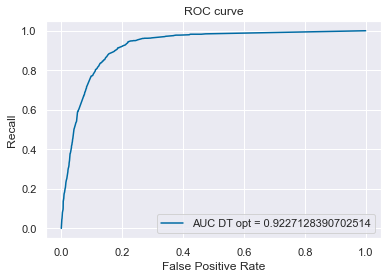

In [107]:
plt.plot(fpr_dt_opt,tpr_dt_opt,label="AUC DT opt = "+str(dt_opt_auc))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()

In [108]:
y_pred_proba_train = dt_opt.predict_proba(X_train)[:,1]
dt_opt_auc_train = roc_auc_score(y_train, y_pred_proba_train)
dt_opt_auc_train

0.9452084742619069

#### Precision-recall curve

In [109]:
precision_dt_opt, recall_dt_opt, _ = precision_recall_curve(y_test, y_pred_proba)

In [110]:
PR_score_dt_opt = auc(recall_dt_opt, precision_dt_opt)
PR_score_dt_opt

0.5767815624982136

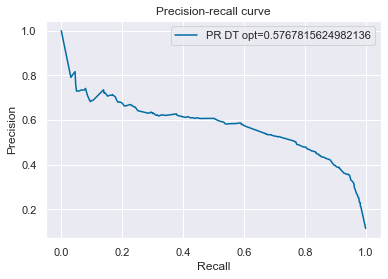

In [111]:
plt.plot(recall_dt_opt, precision_dt_opt, label='PR DT opt=' +str(PR_score_dt_opt))
plt.title('Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [112]:
precision_recall_curve(y_test, y_pred_proba)
precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_proba_train)
auc(recall_train, precision_train)

0.6798513491172018

In [113]:
results_dt_opt = pd.DataFrame({
    'model': ['Decision Tree opt'], 
    'accuracy': [dt_opt_accuracy],
    'precision': [dt_opt_precision],
    'recall': [dt_opt_recall],
    'f1-score': [dt_opt_f1],
    'auc': [dt_opt_auc],
    'PR_score': [PR_score_dt_opt]
    })

In [114]:
pd.concat([results_lr_opt, results_dt_opt])

,model,accuracy,precision,recall,f1-score,auc,PR_score
0,Logistic Regression opt,0.882464,0.489590,0.761332,0.595945,0.923988,0.600680
0,Decision Tree opt,0.868878,0.458248,0.832562,0.591133,0.922713,0.576782


On train set, the AUC is slightly higher but not enough to suspect overfitting.

However, the precision-recall score for the train set is about 0.1 higher than on the test set, which may indicate some overfitting.

Recall is slightly higher than Logistic regresion but f1-score is lower.

## Random Forest

### Optimization of hyperparameters for RF - Random Search

In [115]:
rfc = RandomForestClassifier(random_state=123)

In [116]:
params = {
    'bootstrap': [True, False],
    'n_estimators': np.arange(10,150,30),
    'max_depth': np.arange(3,15),
    'min_samples_leaf': np.arange(20,100),
    'min_samples_split': np.arange(20,100),
    'criterion': ["gini", "entropy"],
    'max_features': ['log2', 'sqrt', None]
}

In [117]:
random_search = RandomizedSearchCV(estimator=rfc, 
                           param_distributions=params, 
                           cv=3, n_jobs=-1, scoring = "roc_auc", n_iter=200, random_state=123)

In [118]:
random_search.fit(X_resampled, y_resampled)
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

Best: 0.945448 using {'n_estimators': 70, 'min_samples_split': 20, 'min_samples_leaf': 21, 'max_features': 'log2', 'max_depth': 14, 'criterion': 'entropy', 'bootstrap': False}


In [119]:
params = {
    'bootstrap': [True, False],
    'n_estimators': np.arange(50,90,10),
    'max_depth': np.arange(10,15),
    'min_samples_leaf': np.arange(20,40),
    'min_samples_split': np.arange(20,40),
    'criterion': ["gini", "entropy"],
    'max_features': ['log2', 'sqrt', None]
}

In [120]:
random_search = RandomizedSearchCV(estimator=rfc, 
                           param_distributions=params, 
                           cv=3, n_jobs=-1, scoring = "roc_auc", n_iter=200, random_state=123)

In [121]:
random_search.fit(X_resampled, y_resampled)
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

Best: 0.945256 using {'n_estimators': 60, 'min_samples_split': 28, 'min_samples_leaf': 25, 'max_features': 'log2', 'max_depth': 14, 'criterion': 'entropy', 'bootstrap': False}


In [122]:
params = {
    'bootstrap': [True, False],
    'n_estimators': np.arange(50,80,10),
    'max_depth': np.arange(12,15),
    'min_samples_leaf': np.arange(20,30),
    'min_samples_split': np.arange(20,35),
    'criterion': ["gini", "entropy"],
    'max_features': ['log2', 'sqrt', None]
}

In [123]:
random_search = RandomizedSearchCV(estimator=rfc, 
                           param_distributions=params, 
                           cv=3, n_jobs=-1, scoring = "roc_auc", n_iter=200, random_state=123)

In [124]:
random_search.fit(X_resampled, y_resampled)
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

Best: 0.945768 using {'n_estimators': 70, 'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': 'log2', 'max_depth': 14, 'criterion': 'entropy', 'bootstrap': False}


In [125]:
rfc_opt = random_search.best_estimator_

### Evaluation metrics - RF

In [126]:
y_pred = rfc_opt.predict(X_test)

In [127]:
confMatrix=pd.DataFrame(confusion_matrix(y_test, y_pred))
confMatrix.columns=[['Predicted 0','Predicted 1']]
confMatrix.index=[['True 0','True 1']]
print('')
print('Confusion Matrix :')
print(confMatrix)


Confusion Matrix :
       Predicted 0 Predicted 1
True 0        7528         886
True 1         207         874


In [128]:
rfc_opt_accuracy = accuracy_score(y_test, y_pred)
rfc_opt_recall = recall_score(y_test, y_pred)
rfc_opt_precision = precision_score(y_test, y_pred)
rfc_opt_f1 = f1_score(y_test, y_pred)

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8414
           1       0.50      0.81      0.62      1081

    accuracy                           0.88      9495
   macro avg       0.73      0.85      0.77      9495
weighted avg       0.92      0.88      0.90      9495



In [130]:
y_pred_train = dt_opt.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     19839
           1       0.45      0.87      0.60      2313

    accuracy                           0.88     22152
   macro avg       0.72      0.87      0.76     22152
weighted avg       0.93      0.88      0.89     22152



#### ROC curve

In [131]:
y_pred_proba = rfc_opt.predict_proba(X_test)[:,1]
fpr_rfc_opt, tpr_rfc_opt, _ = roc_curve(y_test, y_pred_proba)
rfc_opt_auc = roc_auc_score(y_test, y_pred_proba)

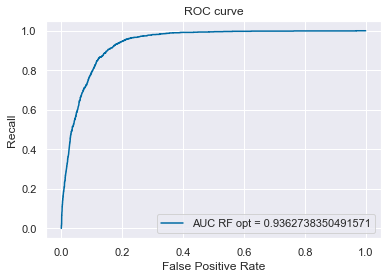

In [132]:
plt.plot(fpr_rfc_opt,tpr_rfc_opt,label="AUC RF opt = "+str(rfc_opt_auc))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()

In [133]:
y_pred_proba_train = rfc_opt.predict_proba(X_train)[:,1]
rfc_opt_auc_train = roc_auc_score(y_train, y_pred_proba_train)
rfc_opt_auc_train

0.9473060231709184

#### Precision-recall curve

In [134]:
precision_rfc_opt, recall_rfc_opt, _ = precision_recall_curve(y_test, y_pred_proba)

In [135]:
PR_score_rfc_opt = auc(recall_rfc_opt, precision_rfc_opt)
PR_score_rfc_opt

0.6207295179720587

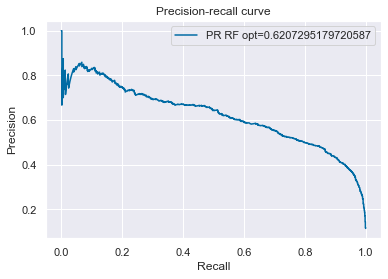

In [136]:
plt.plot(recall_rfc_opt, precision_rfc_opt, label='PR RF opt=' +str(PR_score_rfc_opt))
plt.title('Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [137]:
precision_recall_curve(y_test, y_pred_proba)
precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_proba_train)
auc(recall_train, precision_train)

0.6743781474590086

In [138]:
results_rfc_opt = pd.DataFrame({
    'model': ['Random Forest opt'], 
    'accuracy': [rfc_opt_accuracy],
    'precision': [rfc_opt_precision],
    'recall': [rfc_opt_recall],
    'f1-score': [rfc_opt_f1],
    'auc': [rfc_opt_auc],
    'PR_score': [PR_score_rfc_opt]
    })

In [139]:
pd.concat([results_lr_opt, results_dt_opt, results_rfc_opt])

,model,accuracy,precision,recall,f1-score,auc,PR_score
0,Logistic Regression opt,0.882464,0.489590,0.761332,0.595945,0.923988,0.600680
0,Decision Tree opt,0.868878,0.458248,0.832562,0.591133,0.922713,0.576782
0,Random Forest opt,0.884887,0.496591,0.808511,0.615276,0.936274,0.620730


On train set, the AUC and  the precision-recall score is slightly higher but not enough to suspect overfitting.

Random Forest has achieved the best results so far.

## XGBoost

### Optimization of hyperparameters for XGB - Random Search

In [140]:
xgb = XGBClassifier(objective= 'binary:logistic')

In [141]:
params = {
    'max_depth': np.arange(3,15),
    'min_child_weight': np.arange(20,100),
    'gamma': np.arange(0,0.5,0.1),
    'subsample': [i/10 for i in range(6,11)],
    'colsample_bytree': [i/10 for i in range(6,11)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators': np.arange(10,150,30),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

In [142]:
random_search = RandomizedSearchCV(estimator=xgb, 
                           param_distributions=params, 
                           cv=3, n_jobs=-1, scoring = "roc_auc", n_iter=100, random_state=123)

In [143]:
random_search.fit(X_resampled, y_resampled)
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

[23:20:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.946975 using {'subsample': 0.8, 'reg_alpha': 0.1, 'n_estimators': 130, 'min_child_weight': 35, 'max_depth': 11, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.9}


In [144]:
xgb_opt = random_search.best_estimator_

### Evaluation metrics - XGB

In [145]:
y_pred = xgb_opt.predict(X_test)

In [146]:
confMatrix=pd.DataFrame(confusion_matrix(y_test, y_pred))
confMatrix.columns=[['Predicted 0','Predicted 1']]
confMatrix.index=[['True 0','True 1']]
print('')
print('Confusion Matrix :')
print(confMatrix)


Confusion Matrix :
       Predicted 0 Predicted 1
True 0        7544         870
True 1         231         850


In [147]:
xgb_opt_accuracy = accuracy_score(y_test, y_pred)
xgb_opt_recall = recall_score(y_test, y_pred)
xgb_opt_precision = precision_score(y_test, y_pred)
xgb_opt_f1 = f1_score(y_test, y_pred)

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8414
           1       0.49      0.79      0.61      1081

    accuracy                           0.88      9495
   macro avg       0.73      0.84      0.77      9495
weighted avg       0.92      0.88      0.89      9495



In [149]:
y_pred_train = dt_opt.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     19839
           1       0.45      0.87      0.60      2313

    accuracy                           0.88     22152
   macro avg       0.72      0.87      0.76     22152
weighted avg       0.93      0.88      0.89     22152



#### ROC curve

In [150]:
y_pred_proba = xgb_opt.predict_proba(X_test)[:,1]
fpr_xgb_opt, tpr_xgb_opt, _ = roc_curve(y_test, y_pred_proba)
xgb_opt_auc = roc_auc_score(y_test, y_pred_proba)

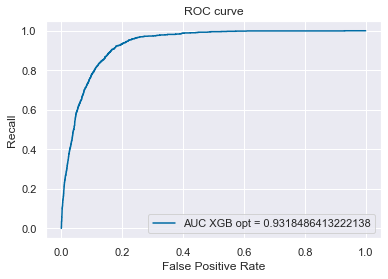

In [151]:
plt.plot(fpr_xgb_opt,tpr_xgb_opt,label="AUC XGB opt = "+str(xgb_opt_auc))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()

In [152]:
y_pred_proba_train = xgb_opt.predict_proba(X_train)[:,1]
xgb_opt_auc_train = roc_auc_score(y_train, y_pred_proba_train)
xgb_opt_auc_train

0.952408304926426

#### Precision-recall curve

In [153]:
precision_xgb_opt, recall_xgb_opt, _ = precision_recall_curve(y_test, y_pred_proba)

In [154]:
PR_score_xgb_opt = auc(recall_xgb_opt, precision_xgb_opt)
PR_score_xgb_opt

0.6039018753018106

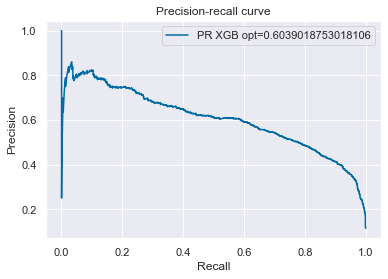

In [155]:
plt.plot(recall_xgb_opt, precision_xgb_opt, label='PR XGB opt=' +str(PR_score_xgb_opt))
plt.title('Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [156]:
precision_recall_curve(y_test, y_pred_proba)
precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_proba_train)
auc(recall_train, precision_train)

0.6962771480605932

In [157]:
results_xgb_opt = pd.DataFrame({
    'model': ['XGBoost opt'], 
    'accuracy': [xgb_opt_accuracy],
    'precision': [xgb_opt_precision],
    'recall': [xgb_opt_recall],
    'f1-score': [xgb_opt_f1],
    'auc': [xgb_opt_auc],
    'PR_score': [PR_score_xgb_opt]
    })

On train set, the AUC is slightly higher but not enough to suspect overfitting.

However, the precision-recall score for the train set is about 0.09 higher than on the test set, which may indicate some overfitting.

A decrease in recall compared to the two previous models.

## Conclusion

In [158]:
pd.concat([results_lr_opt, results_dt_opt, results_rfc_opt, results_xgb_opt])

,model,accuracy,precision,recall,f1-score,auc,PR_score
0,Logistic Regression opt,0.882464,0.489590,0.761332,0.595945,0.923988,0.600680
0,Decision Tree opt,0.868878,0.458248,0.832562,0.591133,0.922713,0.576782
0,Random Forest opt,0.884887,0.496591,0.808511,0.615276,0.936274,0.620730
0,XGBoost opt,0.884044,0.494186,0.786309,0.606926,0.931849,0.603902


* <b>AUC</b>: the highest AUC value was achieved by Random Forest, although it is similar for all models
* <b>Accuracy:</b> similar value for Logistic Regression, Random Forest, XGBoost, the highest for Random Forest
* <b>Precyzja:</b> similar value for Logistic Regression, Random Forest, XGBoost, the highest for Random Forest
* <b>Recall:</b>  the highest for Decision Tree
* <b>F1-score:</b> similar vaule for all models, the highest for Random Forest
* <b>PR score:</b> the highest for Random Forest

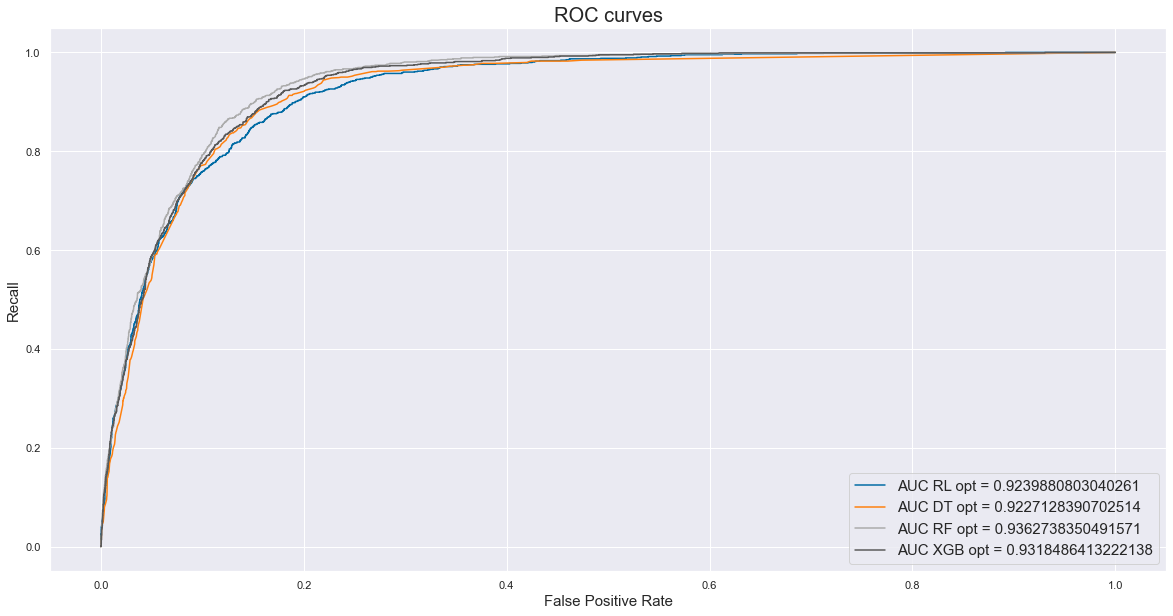

In [159]:
figure = plt.subplots(1,1, figsize=(20,10))
plt.plot(fpr_lr_opt,tpr_lr_opt,label="AUC RL opt = "+str(lr_opt_auc))
plt.plot(fpr_dt_opt,tpr_dt_opt,label="AUC DT opt = "+str(dt_opt_auc))
plt.plot(fpr_rfc_opt,tpr_rfc_opt,label="AUC RF opt = "+str(rfc_opt_auc))
plt.plot(fpr_xgb_opt,tpr_xgb_opt,label="AUC XGB opt = "+str(xgb_opt_auc))
plt.title('ROC curves', size=20)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('Recall', size=15)
plt.legend(loc=4, prop={'size': 15})
plt.show()

Analyzing the ROC curves all models get very similar results

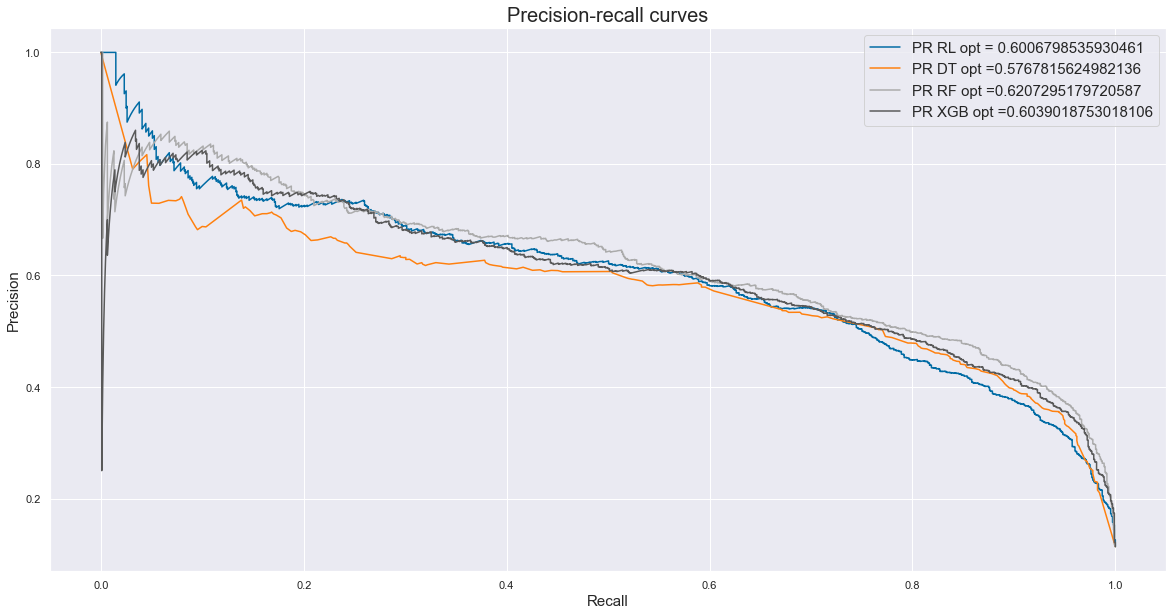

In [160]:
figure, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot(recall_lr_opt, precision_lr_opt, label="PR RL opt = "+str(PR_score_lr_opt))
ax.plot(recall_dt_opt, precision_dt_opt, label='PR DT opt =' +str(PR_score_dt_opt))
ax.plot(recall_rfc_opt, precision_rfc_opt, label='PR RF opt =' +str(PR_score_rfc_opt))
ax.plot(recall_xgb_opt, precision_xgb_opt, label='PR XGB opt =' +str(PR_score_xgb_opt))
plt.title('Precision-recall curves', size=20)
ax.set_xlabel('Recall', size=15)
ax.set_ylabel('Precision', size=15)
ax.legend( prop={'size': 15})

Precision-recall curves are a bit more diverse. Random Forest seems to be the best choice.

If we want very high precision with low recall, we should consider Logistic Regression.